# **Bank Statement Analysis Report**

## **Section 1**
## 1.Transaction Analysis
### 1.1 Total Number of Transactions

In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the bank statement JSON data
file_path = 'P1- BankStatements.json'  # Update this to the actual file path if necessary
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract transaction data
transactions = data['Account']['Transactions']['Transaction']

# Create a DataFrame from the transaction data
df = pd.DataFrame(transactions)
# Calculate the total number of transactions
total_transactions = len(df)
print(f"Total Number of Transactions: {total_transactions}")

Total Number of Transactions: 985


### 1.2 Distribution of Transaction Amounts
1. Small: Transactions ≤ 500 INR
2. Medium: Transactions between 500 INR and 2000 INR
3. Large: Transactions > 2000 INR


Distribution of Transaction Amounts:
transaction_size
Small     745
Medium    164
Large      76
Name: count, dtype: int64


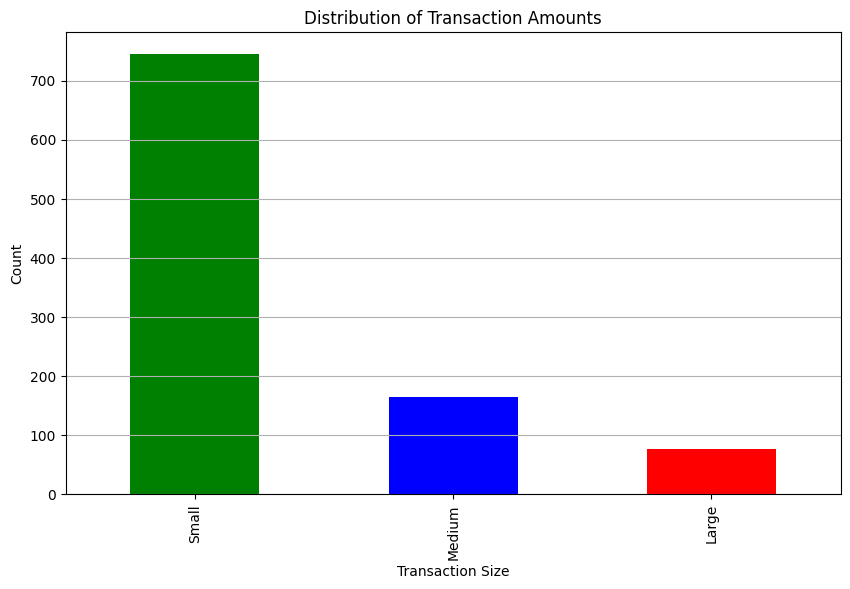

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame setup (replace with your actual DataFrame)
# df = pd.read_json('path_to_your_json_file.json')

# Ensure 'amount' column is numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Drop rows with NaN values in the 'amount' column
df = df.dropna(subset=['amount'])

# Define criteria for small, medium, and large transactions
small_threshold = 500  # Transactions <= 500 are considered small
large_threshold = 2000 # Transactions > 2000 are considered large

# Categorize transactions
df['transaction_size'] = df['amount'].apply(lambda x: 'Small' if x <= small_threshold else ('Large' if x > large_threshold else 'Medium'))

# Count the number of transactions in each category
transaction_size_distribution = df['transaction_size'].value_counts()

# Count the number of transactions in each category
transaction_size_distribution = df['transaction_size'].value_counts()
print("Distribution of Transaction Amounts:")
print(transaction_size_distribution)

# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
transaction_size_distribution.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Size')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


#### 1.3 Transaction Types Frequency

Frequency of Transaction Type:
type
DEBIT     695
CREDIT    290
Name: count, dtype: int64


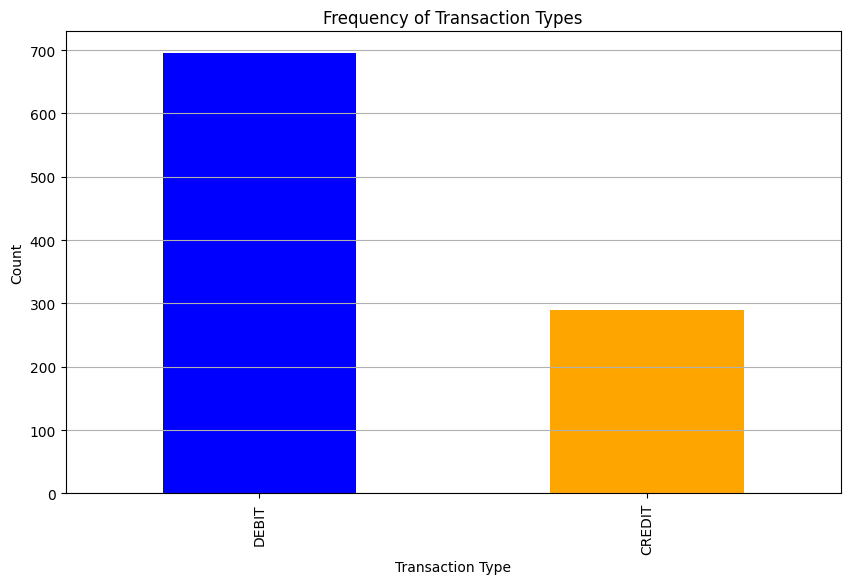

In [16]:
# Count the number of transactions for each type
transaction_types_frequency = df['type'].value_counts()
print("Frequency of Transaction Type:")
print(transaction_types_frequency)

# Plot the frequency of transaction types
plt.figure(figsize=(10, 6))
transaction_types_frequency.plot(kind='bar', color=['blue', 'orange'])
plt.title('Frequency of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


## 2.Balance Analysis
### 2.1 Account Balance Trend Over Time

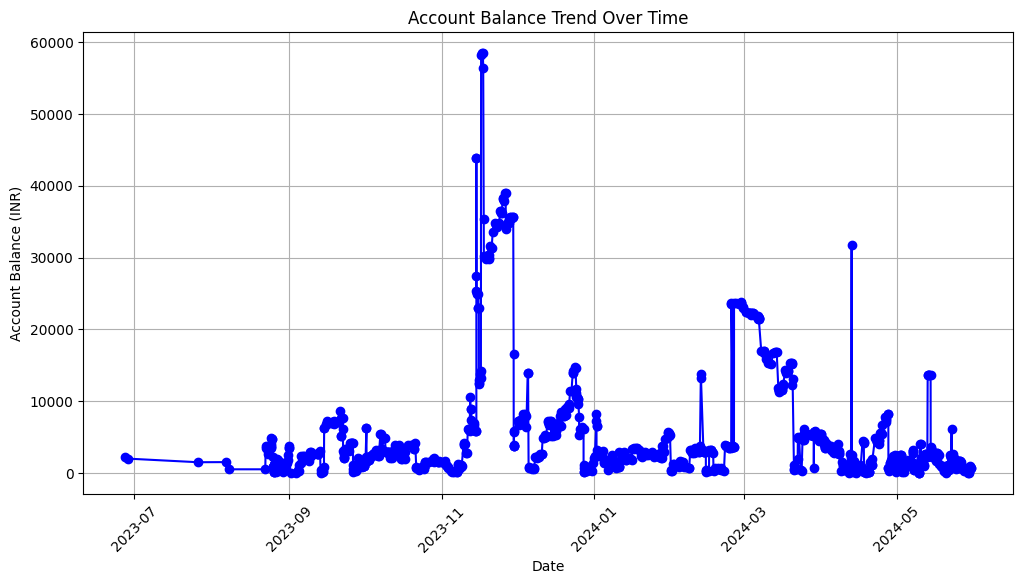

Significant Balance Changes (greater than 10% of the mean balance):
         transactionTimestamp  currentBalance  balance_change
4   2023-08-07 17:13:13+05:30          525.80         -1000.0
6   2023-08-22 11:49:13+05:30         3524.80          3000.0
8   2023-08-23 08:17:48+05:30         2624.80         -1200.0
14  2023-08-24 18:22:22+05:30         4834.80           750.0
17  2023-08-25 10:24:38+05:30         2244.80         -2480.0
..                        ...             ...             ...
948 2024-05-24 19:33:51+05:30         1220.31           600.0
950 2024-05-25 07:47:07+05:30         1690.31           600.0
954 2024-05-25 14:11:41+05:30          930.31          -640.0
959 2024-05-25 22:54:11+05:30         1690.31          1000.0
981 2024-05-30 05:07:05+05:30          961.41           938.0

[227 rows x 3 columns]


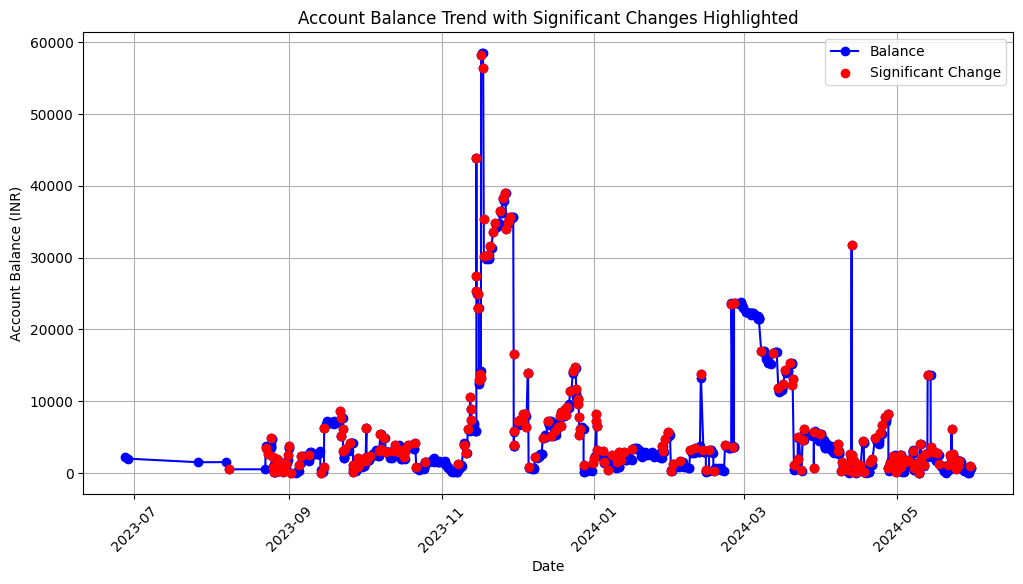

In [19]:
categories = {
    'fuel': ['FUEL', 'PETROL', 'GAS'],
    'ecommerce': ['AMAZON', 'FLIPKART', 'E-COMMERCE'],
    'food': ['FOOD', 'RESTAURANT', 'DINING'],
    'shopping': ['SHOPPING', 'MALL', 'STORE'],
    'atm_withdrawals': ['ATM'],
    'upi_transactions': ['UPI'],
    'others': []
}

# Initialize category column
df['category'] = 'others'

# Assign categories based on narrations
for category, keywords in categories.items():
    pattern = '|'.join(keywords)
    df.loc[df['description'].str.contains(pattern, case=False, na=False), 'category'] = category

# Calculate spending by category for debit transactions
spending_by_category = df[df['txnType'] == 'DEBIT'].groupby('category')['amount'].sum().to_dict()

print("Spending by Category:")
print(spending_by_category)


## 3.  Spending Patterns

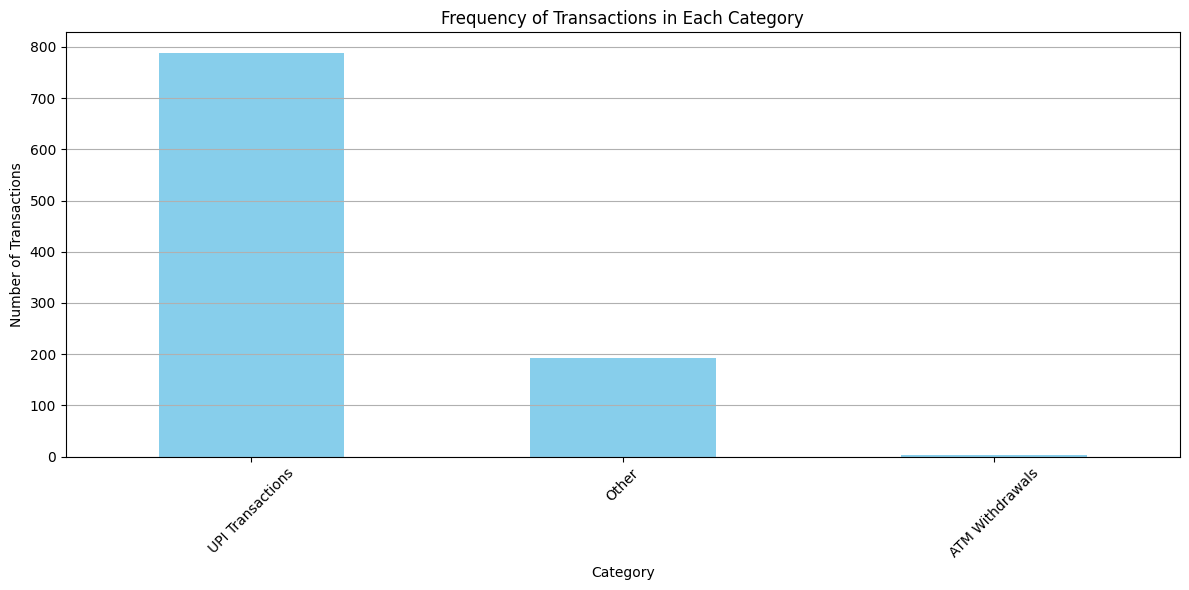

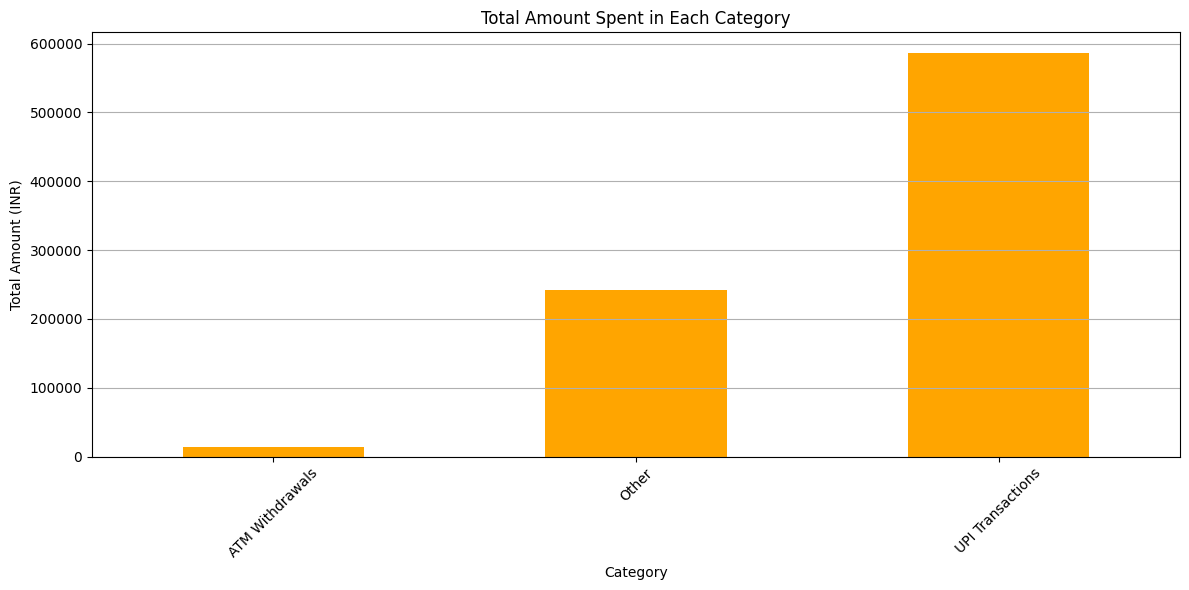

Frequency of Transactions in Each Category:
category
UPI Transactions    789
Other               193
ATM Withdrawals       3
Name: count, dtype: int64

Total Amount Spent in Each Category:
category
ATM Withdrawals      13500.00
Other               242067.51
UPI Transactions    587092.90
Name: amount, dtype: float64


In [24]:
# Define the relevant columns based on the JSON structure
description_column = 'narration'  # Column with transaction descriptions
amount_column = 'amount'  # Column with transaction amounts

# Convert 'amount' to numeric, handling any errors
df[amount_column] = pd.to_numeric(df[amount_column], errors='coerce')

# Drop rows where 'amount' couldn't be converted to a number
df = df.dropna(subset=[amount_column])

# Categorize transactions based on the narration
def categorize_transaction(description):
    description = description.lower()
    if 'fuel' in description or 'petrol' in description:
        return 'Fuel'
    elif 'ecommerce' in description or 'shopping' in description or 'amazon' in description or 'flipkart' in description:
        return 'E-commerce/Shopping'
    elif 'food' in description or 'restaurant' in description or 'grocery' in description:
        return 'Food'
    elif 'atm' in description:
        return 'ATM Withdrawals'
    elif 'upi' in description or 'paytm' in description or 'google pay' in description:
        return 'UPI Transactions'
    else:
        return 'Other'

# Apply the categorization function to create a new 'category' column
df['category'] = df[description_column].apply(categorize_transaction)

# Analyze the frequency of transactions in each category
category_frequency = df['category'].value_counts()

# Analyze the total amount of spending in each category
category_amount = df.groupby('category')[amount_column].sum()

# Plot the frequency of transactions in each category
plt.figure(figsize=(12, 6))
category_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Transactions in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('frequency_of_transactions.png')  # Save the plot as an image
plt.show()

# Plot the total amount of spending in each category
plt.figure(figsize=(12, 6))
category_amount.plot(kind='bar', color='orange')
plt.title('Total Amount Spent in Each Category')
plt.xlabel('Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('total_amount_spent.png')  # Save the plot as an image
plt.show()

# Display the analyzed data
print("Frequency of Transactions in Each Category:")
print(category_frequency)
print("\nTotal Amount Spent in Each Category:")
print(category_amount)


## 4.  Income Analysis: 

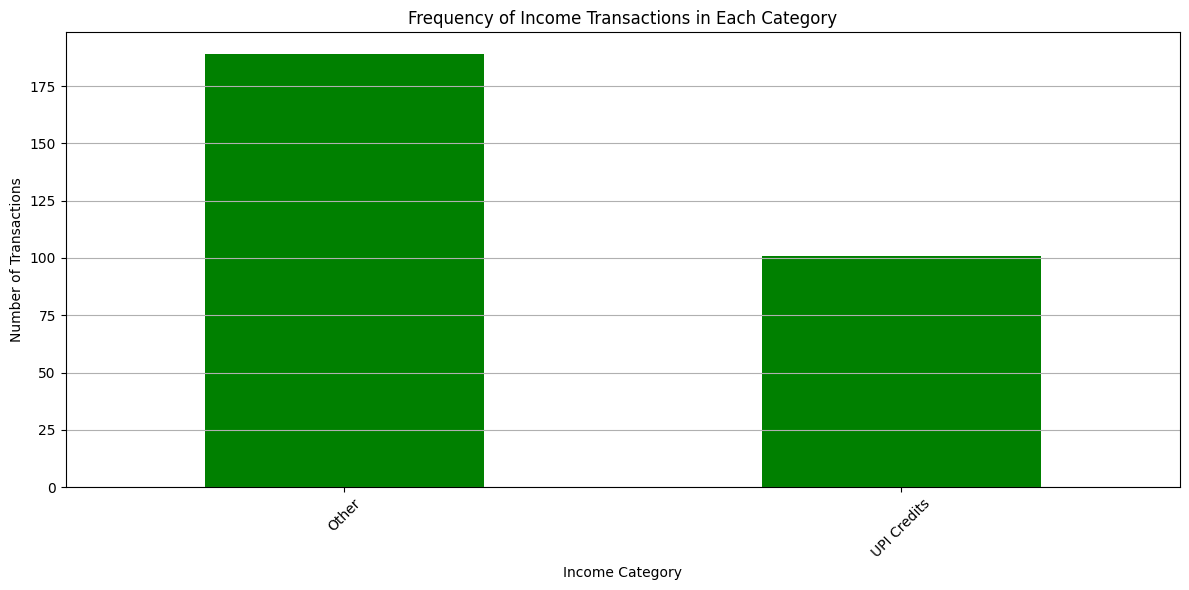

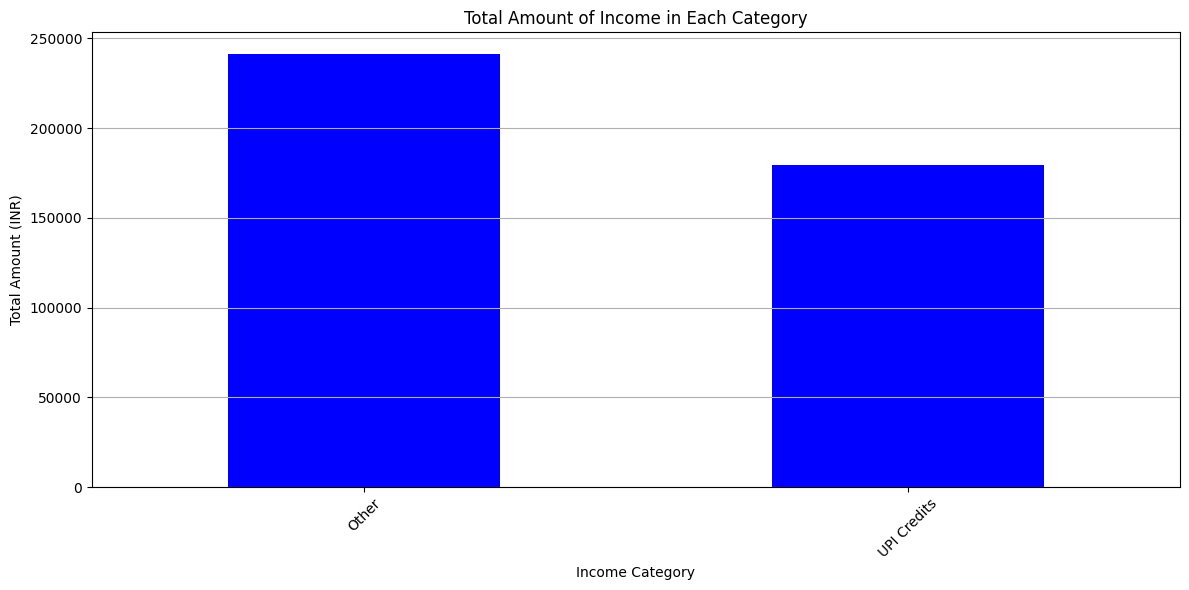

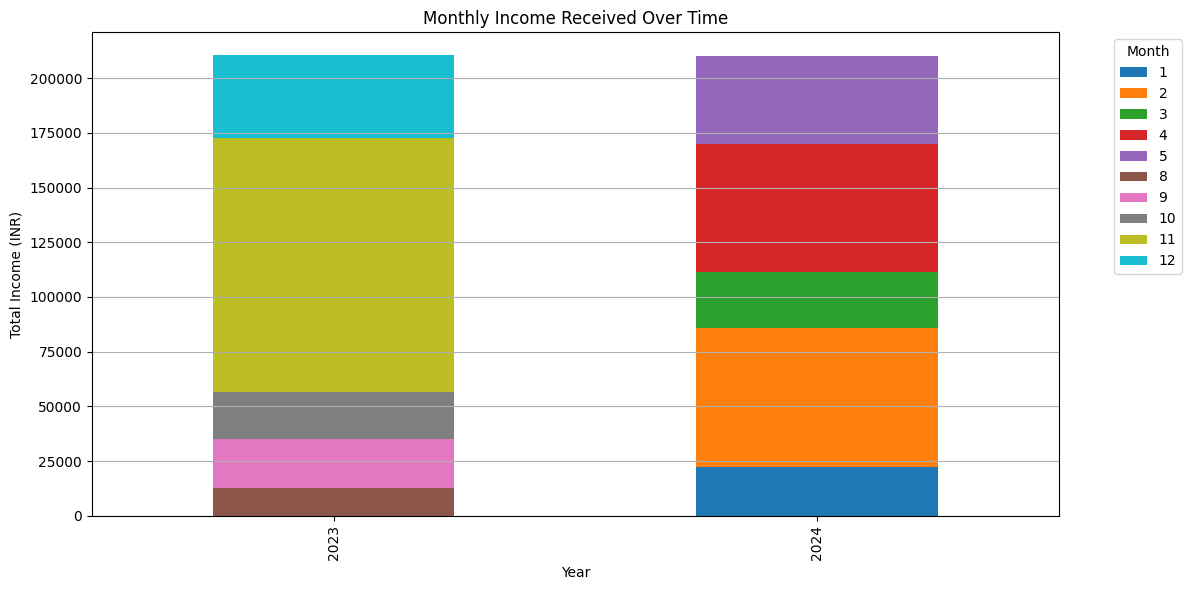

Frequency of Income Transactions in Each Category:
income_category
Other          189
UPI Credits    101
Name: count, dtype: int64

Total Amount of Income in Each Category:
income_category
Other          241237.51
UPI Credits    179333.00
Name: amount, dtype: float64

Monthly Income Received:
year  month
2023  8         12679.00
      9         22605.00
      10        21472.00
      11       115737.00
      12        37953.51
2024  1         22127.00
      2         63782.00
      3         25420.00
      4         58660.00
      5         40135.00
Name: amount, dtype: float64


In [26]:
# Define the relevant columns based on the JSON structure
description_column = 'narration'  # Column with transaction descriptions
amount_column = 'amount'  # Column with transaction amounts
transaction_type_column = 'type'  # Column with transaction type (CREDIT/DEBIT)
timestamp_column = 'transactionTimestamp'  # Column with transaction timestamps

# Convert 'amount' to numeric, handling any errors
df[amount_column] = pd.to_numeric(df[amount_column], errors='coerce')

# Drop rows where 'amount' couldn't be converted to a number
df = df.dropna(subset=[amount_column])

# Filter only 'CREDIT' transactions for income analysis
income_df = df[df[transaction_type_column].str.upper() == 'CREDIT'].copy()

# Categorize income transactions based on the narration
def categorize_income(description):
    description = description.lower()
    if 'salary' in description or 'salary credit' in description:
        return 'Salary'
    elif 'upi' in description or 'gpay' in description or 'paytm' in description:
        return 'UPI Credits'
    elif 'refund' in description:
        return 'Refund'
    elif 'interest' in description or 'dividend' in description:
        return 'Interest/Dividend'
    else:
        return 'Other'

# Apply the categorization function to create a new 'income_category' column
income_df['income_category'] = income_df[description_column].apply(categorize_income)

# Analyze the frequency of income transactions in each category
income_category_frequency = income_df['income_category'].value_counts()

# Analyze the total amount of income in each category
income_category_amount = income_df.groupby('income_category')[amount_column].sum()

# Plot the frequency of income transactions in each category
plt.figure(figsize=(12, 6))
income_category_frequency.plot(kind='bar', color='green')
plt.title('Frequency of Income Transactions in Each Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('income_frequency.png')  # Save the plot as an image
plt.show()

# Plot the total amount of income in each category
plt.figure(figsize=(12, 6))
income_category_amount.plot(kind='bar', color='blue')
plt.title('Total Amount of Income in Each Category')
plt.xlabel('Income Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('income_amount.png')  # Save the plot as an image
plt.show()

# Ensure 'transactionTimestamp' is converted to datetime, coercing errors
income_df[timestamp_column] = pd.to_datetime(income_df[timestamp_column], errors='coerce')

# Drop rows where 'transactionTimestamp' couldn't be converted to datetime
income_df = income_df.dropna(subset=[timestamp_column])

# Extract year, month, and day for pattern analysis
# Use .loc to avoid SettingWithCopyWarning
income_df.loc[:, 'year'] = income_df[timestamp_column].dt.year
income_df.loc[:, 'month'] = income_df[timestamp_column].dt.month
income_df.loc[:, 'day'] = income_df[timestamp_column].dt.day

# Analyze the monthly income received
monthly_income = income_df.groupby(['year', 'month'])[amount_column].sum()

# Plot the monthly income received
monthly_income.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Income Received Over Time')
plt.xlabel('Year')
plt.ylabel('Total Income (INR)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('monthly_income.png')  # Save the plot as an image
plt.show()

# Display the analyzed data
print("Frequency of Income Transactions in Each Category:")
print(income_category_frequency)
print("\nTotal Amount of Income in Each Category:")
print(income_category_amount)
print("\nMonthly Income Received:")
print(monthly_income)


## 5.  Alert Generation

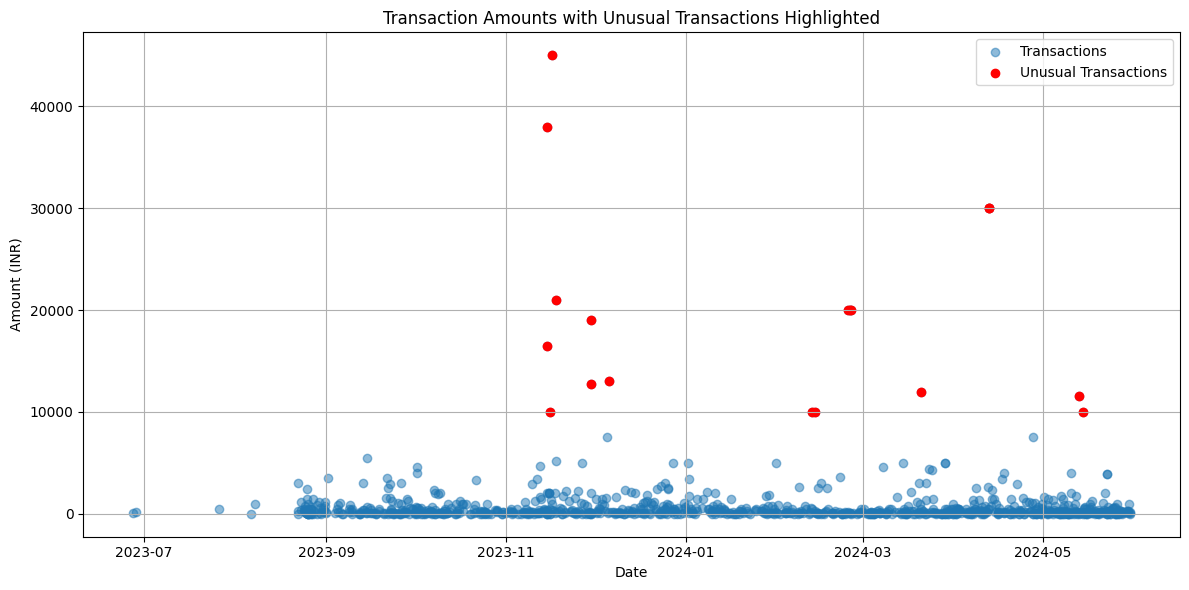

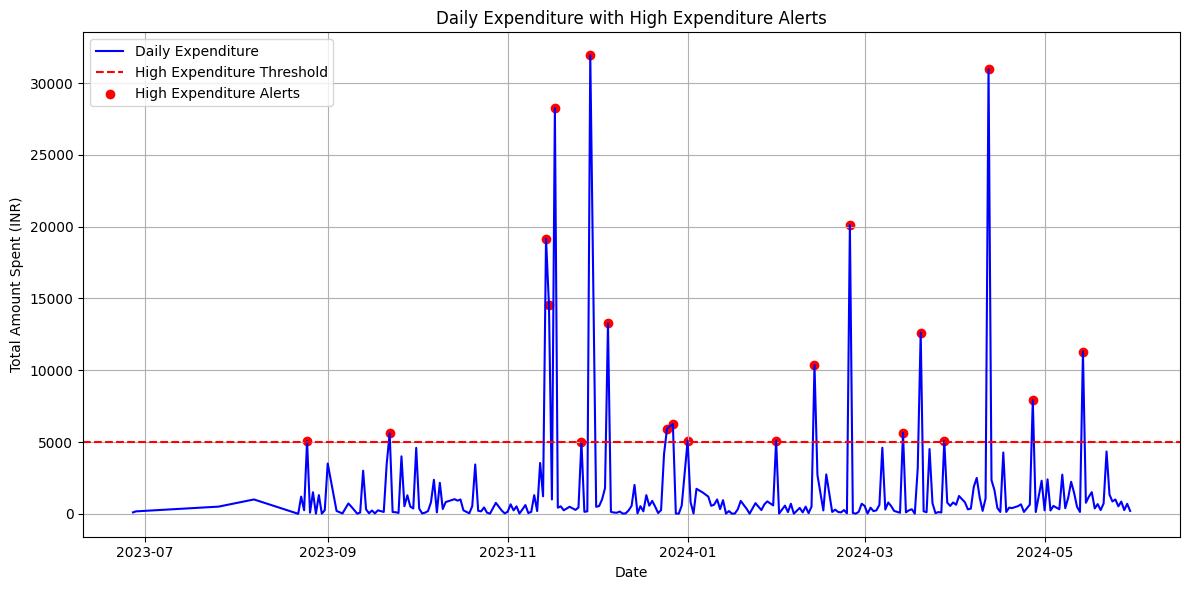

Unusual or Suspicious Transactions:
       type    mode   amount  currentBalance      transactionTimestamp  \
275  CREDIT     UPI  37999.0        43892.80 2023-11-14 18:31:11+05:30   
277   DEBIT     UPI  16500.0        27391.80 2023-11-14 18:49:41+05:30   
285   DEBIT     UPI  10000.0        12970.80 2023-11-15 17:48:21+05:30   
291  CREDIT    CASH  45000.0        58180.80 2023-11-16 15:51:14+05:30   
295   DEBIT     UPI  21000.0        35400.80 2023-11-17 16:34:54+05:30   
332   DEBIT     UPI  19000.0        16625.80 2023-11-29 16:15:33+05:30   
333   DEBIT     UPI  12700.0         3925.80 2023-11-29 17:09:47+05:30   
353   DEBIT     UPI  13000.0          865.80 2023-12-05 15:50:06+05:30   
535  CREDIT     UPI  10000.0        13744.81 2024-02-12 13:22:57+05:30   
537   DEBIT     ATM  10000.0         3244.81 2024-02-13 14:01:51+05:30   
570  CREDIT     UPI  20000.0        23483.91 2024-02-24 18:55:15+05:30   
572   DEBIT     UPI  20000.0         3683.91 2024-02-25 11:08:34+05:30   
57

In [27]:
# Define the relevant columns based on the JSON structure
amount_column = 'amount'  # Column with transaction amounts
transaction_type_column = 'type'  # Column with transaction type (CREDIT/DEBIT)
balance_column = 'currentBalance'  # Column with current balance after transaction
timestamp_column = 'transactionTimestamp'  # Column with transaction timestamps

# Convert 'amount' and 'currentBalance' to numeric, handling any errors
df[amount_column] = pd.to_numeric(df[amount_column], errors='coerce')
df[balance_column] = pd.to_numeric(df[balance_column], errors='coerce')

# Drop rows where 'amount' or 'currentBalance' couldn't be converted to a number
df = df.dropna(subset=[amount_column, balance_column])

# Ensure 'transactionTimestamp' is converted to datetime, coercing errors
df[timestamp_column] = pd.to_datetime(df[timestamp_column], errors='coerce')

# Drop rows where 'transactionTimestamp' couldn't be converted to datetime
df = df.dropna(subset=[timestamp_column])

# Analyze for unusual or suspicious transactions
# Calculate the mean and standard deviation of transaction amounts
mean_amount = df[amount_column].mean()
std_amount = df[amount_column].std()

# Define thresholds for unusual transactions (e.g., 3 standard deviations from the mean)
upper_threshold = mean_amount + 3 * std_amount
lower_threshold = mean_amount - 3 * std_amount

# Identify transactions that are unusually high or low
unusual_transactions = df[(df[amount_column] > upper_threshold) | (df[amount_column] < lower_threshold)]

# Generate alerts for low balance
# Define a low balance threshold (e.g., below 1000)
low_balance_threshold = 1000
low_balance_alerts = df[df[balance_column] < low_balance_threshold]

# Generate alerts for high expenditure periods
# Calculate daily expenditure
df['date'] = df[timestamp_column].dt.date
daily_expenditure = df[df[transaction_type_column].str.upper() == 'DEBIT'].groupby('date')[amount_column].sum()

# Define a high expenditure threshold (e.g., spending more than 5000 in a day)
high_expenditure_threshold = 5000
high_expenditure_alerts = daily_expenditure[daily_expenditure > high_expenditure_threshold]

# Plot the unusual transactions
plt.figure(figsize=(12, 6))
plt.scatter(df[timestamp_column], df[amount_column], label='Transactions', alpha=0.5)
plt.scatter(unusual_transactions[timestamp_column], unusual_transactions[amount_column], color='red', label='Unusual Transactions')
plt.title('Transaction Amounts with Unusual Transactions Highlighted')
plt.xlabel('Date')
plt.ylabel('Amount (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('unusual_transactions.png')  # Save the plot as an image
plt.show()

# Plot the daily expenditure with high expenditure alerts
plt.figure(figsize=(12, 6))
daily_expenditure.plot(kind='line', label='Daily Expenditure', color='blue')
plt.axhline(y=high_expenditure_threshold, color='red', linestyle='--', label='High Expenditure Threshold')
plt.scatter(high_expenditure_alerts.index, high_expenditure_alerts, color='red', label='High Expenditure Alerts')
plt.title('Daily Expenditure with High Expenditure Alerts')
plt.xlabel('Date')
plt.ylabel('Total Amount Spent (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('high_expenditure_alerts.png')  # Save the plot as an image
plt.show()

# Display the analyzed data
print("Unusual or Suspicious Transactions:")
print(unusual_transactions)

print("\nLow Balance Alerts:")
print(low_balance_alerts[[timestamp_column, balance_column]])

print("\nHigh Expenditure Alerts:")
print(high_expenditure_alerts)


Significant Balance Changes (exceeding 2 standard deviations):
         transactionTimestamp  currentBalance  balance_change
275 2023-11-14 18:31:11+05:30        43892.80         37999.0
277 2023-11-14 18:49:41+05:30        27391.80        -16500.0
285 2023-11-15 17:48:21+05:30        12970.80        -10000.0
291 2023-11-16 15:51:14+05:30        58180.80         45000.0
295 2023-11-17 16:34:54+05:30        35400.80        -21000.0
332 2023-11-29 16:15:33+05:30        16625.80        -19000.0
333 2023-11-29 17:09:47+05:30         3925.80        -12700.0
351 2023-12-05 07:08:30+05:30        13925.80          7560.0
353 2023-12-05 15:50:06+05:30          865.80        -13000.0
535 2024-02-12 13:22:57+05:30        13744.81         10000.0
537 2024-02-13 14:01:51+05:30         3244.81        -10000.0
570 2024-02-24 18:55:15+05:30        23483.91         20000.0
572 2024-02-25 11:08:34+05:30         3683.91        -20000.0
576 2024-02-25 20:08:58+05:30        23664.91         20000.0
648 202

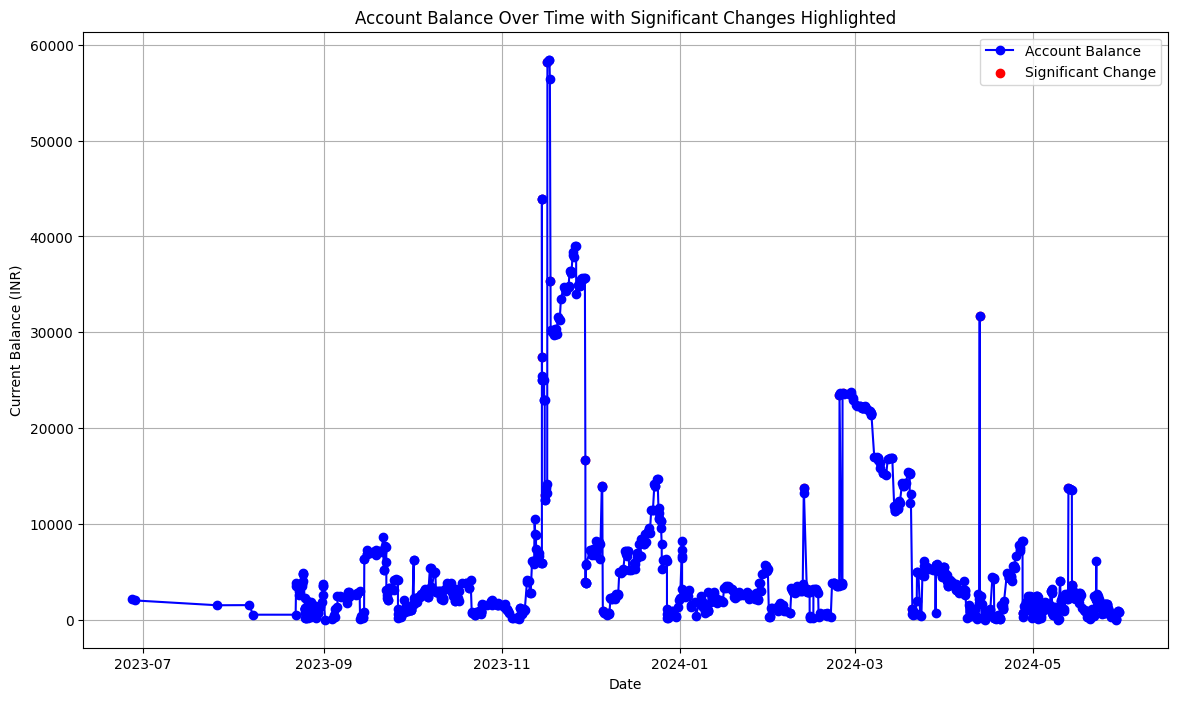

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame `df` has been prepared as described earlier

# Convert 'transactionTimestamp' to datetime if not already done
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])

# Sort by transaction timestamp to ensure sequential order
df = df.sort_values(by='transactionTimestamp')

# Calculate the difference in account balance between consecutive transactions
df['balance_change'] = df['currentBalance'].diff()

# Calculate the standard deviation of balance changes
std_balance_change = df['balance_change'].std()

# Define significant change as those changes exceeding 2 standard deviations
significant_threshold = 2 * std_balance_change

# Identify significant changes
significant_changes = df[df['balance_change'].abs() > significant_threshold]

# Display significant changes
print("Significant Balance Changes (exceeding 2 standard deviations):")
print(significant_changes[['transactionTimestamp', 'currentBalance', 'balance_change']])

# Plot the account balance over time with significant changes highlighted
plt.figure(figsize=(14, 8))

# Plot the account balance trend
plt.plot(df['transactionTimestamp'], df['currentBalance'], marker='o', linestyle='-', color='blue', label='Account Balance')

# Highlight significant changes
plt.scatter(significant_changes['transactionTimestamp'], significant_changes['currentBalance'], color='red', label='Significant Change')

# Add titles and labels
plt.title('Account Balance Over Time with Significant Changes Highlighted')
plt.xlabel('Date')
plt.ylabel('Current Balance (INR)')
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('significant_balance_changes.png')

# Show the plot
plt.show()
